<a href="https://colab.research.google.com/github/Joostmaghetweten/test/blob/main/Assignment_1_CodeGrade_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression and Cross Validation [26 pts]

---
### Never remove/delete/modify cells that you need to fill in! If you accidentally modify a 'solution' cell in such a way, you'll have to re-download the template and copy-paste your code! Otherwise, CodeGrade will not grade it!
---
For the first assignment we will do something that might seem familiar from *Probability Theory for Machine Learning*: fit a polynomial function to a provided dataset. Fitting a function is a quintessential example of *supervised learning*, specifically *regression*, making it a great place to start learning about *machine learning*. There are several concepts here that are applicable to lots of *supervised learning* algorithms, so it will be good to cover them in a familiar context first.

The notion of a *cost function* will be introduced.  It describes how well a given model fits the provided data. This function can then be minimized in several different ways, depending on complexity of the model and associated cost function.

We will start with the most basic model (linear) and compute the parameters that minimize the cost function directly, based on the derivate. It is important that you try and comprehend what you are doing in this most basic version (instead of just blindly trying to implement functions until they seem to work), as it will help you understand the more complex models that use the same principles later on. This means actually **watching the linked videos** and computing the partial derivates yourself to verify that you understand all of the steps.

The other common concept introduced is model selection using *cross validation*. In this assignment it will be used to determine the degree of the polynomial we are fitting. Both cross validation for model selection and minizing a the cost function to achieve the best possible fit, are used in many other supervised models, like for example *neural networks*.

## Material

The material for this assignment is based on sections **2.6 - 2.8** and **4.6 - 4.8** of the book *[Introduction to Machine Learning](https://www.cmpe.boun.edu.tr/~ethem/i2ml3e/)* by Ethem Alpaydin. In addition, there will be links to videos from Andrew Ng's *[Machine Learning course on Coursera](https://www.coursera.org/learn/machine-learning)* to provide some extra explanations and help create intuitions.

Generally speaking, we will often use built-in functions for this course, but for this assignment you **may not** use any of the polynomial functions listed [here](https://numpy.org/doc/stable/reference/routines.polynomials.poly1d.html) or any other built-in polynomial solution methods. You can of course use them to check that your own implementations work correctly.

## Preliminaries
In total **there are *26* points available in this exercise**. Below there is some code to get you started. You do not need to add any code for this cell to work, just make sure you run the cell to actually import the libraries in your notebook.


In [82]:
# Possible libraries that you might need to install should they not be present in your current setup.
# (uncomment the line below to install if necessary).

%pip install numpy matplotlib scipy ipython scikit-learn seaborn

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

%matplotlib inline

# Sets the random seed for Numpy such that Codegrade will have the same randomization
# DO NOT CHANGE THE LINE BELOW WHEN HANDING IN TO CODEGRADE!
RANDOM_SEED = 1

For the sake of simplicity, we won't use any real data in this assignment.  Instead, below I provide a function that will simulate data.  **Do not alter this code block**.  The data set is contained in a variable named *points*.

In [84]:
# Simulate data from a special function
# You don't have to understand the next 4 lines
from scipy.special import yn as secret_function
x = np.hstack([np.linspace(1, 10, 10), np.linspace(2, 9, 5), np.linspace(.5, 10.5, 15)])
offset = np.linspace(.3, 0, 30)
y = secret_function(2, x) + offset

# final data variable
points = np.vstack([x, y]).T

# Domain of the data, to help with plotting later on
plot_lims_x = [0, 11]
plot_lims_y = [-2, 1]

## Printing the data [1 pt]

Print the array *points* (generated in the preceding code block) to make sure you know what the data looks like.

In [85]:
def print_data():
    """
    Prints the data and returns the variable (for the Autotest)

    Output:
    - The data array.
    """
    # YOUR SOLUTION HERE (make sure you print & return the array as well)
    print(points)
    return points

print_data()


[[ 1.00000000e+00 -1.35068261e+00]
 [ 2.00000000e+00 -3.27752932e-01]
 [ 3.00000000e+00  1.18909951e-01]
 [ 4.00000000e+00  4.84869112e-01]
 [ 5.00000000e+00  6.26283572e-01]
 [ 6.00000000e+00  4.78133765e-01]
 [ 7.00000000e+00  1.77404425e-01]
 [ 8.00000000e+00 -3.54503979e-02]
 [ 9.00000000e+00 -9.51430226e-03]
 [ 1.00000000e+01  2.01028469e-01]
 [ 2.00000000e+00 -4.20856380e-01]
 [ 3.75000000e+00  3.22746822e-01]
 [ 5.50000000e+00  5.06703302e-01]
 [ 7.25000000e+00  3.72745752e-02]
 [ 9.00000000e+00 -7.15832678e-02]
 [ 5.00000000e-01 -5.29654325e+00]
 [ 1.21428571e+00 -1.10797204e+00]
 [ 1.92857143e+00 -5.30432547e-01]
 [ 2.64285714e+00 -2.03509678e-01]
 [ 3.35714286e+00  9.25875447e-02]
 [ 4.07142857e+00  3.29111405e-01]
 [ 4.78571429e+00  4.43115702e-01]
 [ 5.50000000e+00  4.03255026e-01]
 [ 6.21428571e+00  2.34673759e-01]
 [ 6.92857143e+00  1.18122545e-02]
 [ 7.64285714e+00 -1.72821973e-01]
 [ 8.35714286e+00 -2.48235360e-01]
 [ 9.07142857e+00 -1.94519833e-01]
 [ 9.78571429e+00 -4

array([[ 1.00000000e+00, -1.35068261e+00],
       [ 2.00000000e+00, -3.27752932e-01],
       [ 3.00000000e+00,  1.18909951e-01],
       [ 4.00000000e+00,  4.84869112e-01],
       [ 5.00000000e+00,  6.26283572e-01],
       [ 6.00000000e+00,  4.78133765e-01],
       [ 7.00000000e+00,  1.77404425e-01],
       [ 8.00000000e+00, -3.54503979e-02],
       [ 9.00000000e+00, -9.51430226e-03],
       [ 1.00000000e+01,  2.01028469e-01],
       [ 2.00000000e+00, -4.20856380e-01],
       [ 3.75000000e+00,  3.22746822e-01],
       [ 5.50000000e+00,  5.06703302e-01],
       [ 7.25000000e+00,  3.72745752e-02],
       [ 9.00000000e+00, -7.15832678e-02],
       [ 5.00000000e-01, -5.29654325e+00],
       [ 1.21428571e+00, -1.10797204e+00],
       [ 1.92857143e+00, -5.30432547e-01],
       [ 2.64285714e+00, -2.03509678e-01],
       [ 3.35714286e+00,  9.25875447e-02],
       [ 4.07142857e+00,  3.29111405e-01],
       [ 4.78571429e+00,  4.43115702e-01],
       [ 5.50000000e+00,  4.03255026e-01],
       [ 6.

## Plotting the points [1 pt]

First we want to separate our input from our targets. Write a function `split_X_r` to separate your `data` into an X matrix (input) and an r vector (targets) using [slicing](https://numpy.org/doc/stable/user/basics.indexing.html).

Using both vectors, create a graph containing the points that you printed above. For this you can use the *matplotlib* functions [plot](https://matplotlib.org/stable/api/pyplot_summary.html) and [show](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html). A plot of data should be visible below your code. HINT: [You can check the shapes](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) of X and R, they should both be (30,1).

Note that we denote X as a matrix whereas we denote r as a vector. We denote X as a matrix to make it more general; in most cases you have multiple input features for every data entry. In contrary, mutliple targets for every data entry is less common.

(30, 1) (30, 1)


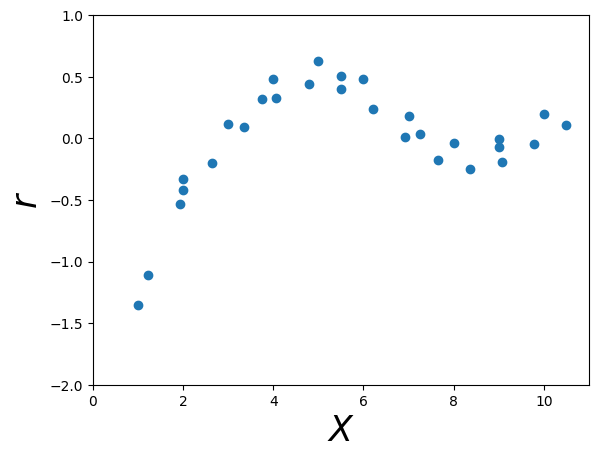

In [86]:
def split_X_r(data):
    """
    Splits the data into the X and R components.

    Input:
    data - A Numpy array containing the data.

    Output:
    - 2 Numpy arrays containing the data & the targets.
    """
    X = data[:, 0:1]
    r = data[:, 1:2]
    return X, r


X, r = split_X_r(points)

print(X.shape, r.shape)

# plot
plt.scatter(X, r)
plt.xlabel("$X$", fontsize=25)
plt.ylabel("$r$", fontsize=25)
plt.xlim(plot_lims_x)
plt.ylim(plot_lims_y)
plt.show()


## Defining the linear model [1 pt]

Now we are going to try to find the function which best relates these points. We will start by fitting a simple linear function of the form

(2.15) $$g(x_n) = w_1x_n + w_0$$

*For more detailed description of linear regression, watch Andrew's videos on the topic. The notation is slightly different, $y$ instead of $r$ for the output, but the actual model is identical.*

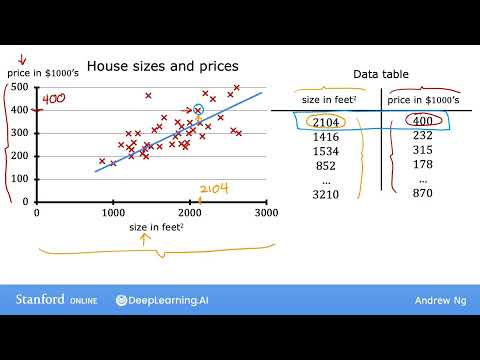

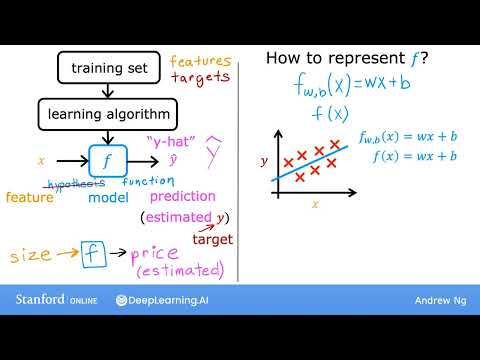

In [87]:
# CodeGrade Tag ignore Video1
display(YouTubeVideo('dLc-lfEEYss'))
display(YouTubeVideo('KWULpBYzIYk'))

Now write a function that computes the predicted output $g(X)$ given the input X and the parameters $w_0$ and $w_1$. This should be very straightforward, but make sure you understand what part this plays in our supervised learning problem before moving on.

In [88]:
def linear_model(w0, w1, x):
    """
    Computes the Linear model for the given parameters & input.

    Input:
    w0 - Parameter W0
    w1 - Parameter W1
    x - Numpy array containing the input data.

    Output:
    - A Numpy array containing the output of the Linear model.
    """
    return w0 + w1 * x


## Creating the cost function [1 pt]

The cost function is defined as the sum of the squared errors of each prediction

(2.16) $$\ell(w_1, w_0; X, r) = \frac{1}{2N}\sum^N_{n=1} [r_n - g(X_n)]^2 = \frac{1}{2N}\sum^N_{n=1} [r_n - (w_1X_n + w_0)]^2$$

*These videos are great for building intuition on the relation between the hypothesis function and the associated cost of that hypothesis for the data.*

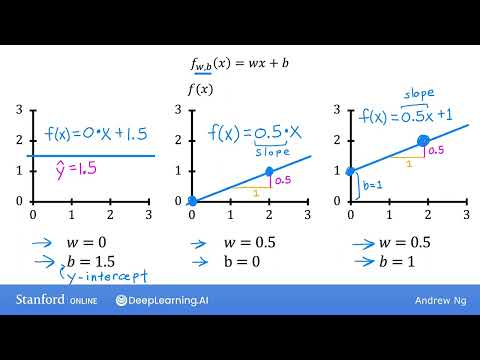

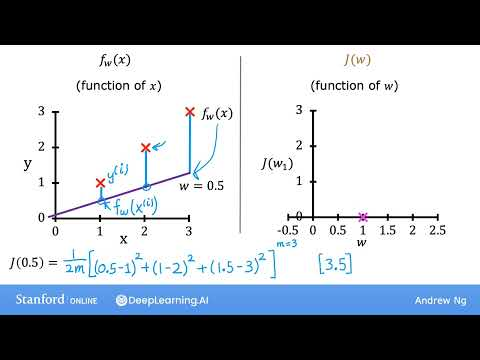

In [89]:
# CodeGrade Tag ignore Video2
display(YouTubeVideo('CFN5zHzEuGY'))
display(YouTubeVideo('peNRqkfukYY'))

Write a function to compute the cost based on the dataset $X$, $R$ and parameters $w_0$ and $w_1$. Based on your plot of the data, try to estimate some sensible values for $w_0$ and $w_1$ and compute the corresponding cost.
Try to write this function without a for-loop to speed thing up!

In [90]:
# CodeGrade Tag test4
def linear_cost(w0, w1, X, r):
    """
    Computes the Linear cost function.

    Input:
    w0 - Parameter W0.
    w1 - Parameter W1.
    X - Input data X (note the capitalization).
    r - Target data r.

    Output:
    A numpy array containing the linear cost as defined in the formula.
    """
    # YOUR SOLUTION HERE
    N = len(X)
    Voorspelling = linear_model(w0, w1, x)
    error = r - Voorspelling
    kwadraat_error = error**2
    eindkost = (1 / (2 * N)) * np.sum(kwadraat_error)
    return eindkost
print(linear_cost(-1, 0.15, X, r))


19.236698362867642


## Fitting the linear model [5 pt]

We can find the minimum value of the cost function by taking the partial derivatives of that cost function for both of the weights $w_0$ and $w_1$ and setting them equal to $0$, resulting in the equations

(2.17a) $$w_1 = \frac{\sum_n X_n r_n - \bar{X}\bar{r}N}{\sum_n X_n^2 - N\bar{X}^2}$$
(2.17b) $$w_0 = \bar{r} - w_1\bar{X}$$

You can compute the partial derivates of equation *2.16* yourself and set them both equal to zero, to check you understand where these two equations come from. Minimizing the cost function gives us the best possible parameters for a linear model predicting the values of the provided dataset. *Note:* If you are unfamiliar with the notation $\bar{X}$, it is defined in *Alpaydin* too, below equation *2.17*.

Write a function which computes the optimal values of $w_0$ and $w_1$ for a dataset consisting of $X$ and $r$, containing $N$ elements each. Print the cost of this fit.  Then use *matplotlib* again to plot the points, but now also add the line representing the hypothesis function you found. As the line is linear, you can simply plot it by computing the 2 end points and have *matplotlib* draw the connecting line.

Note that with some clever [array operations](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html) and [linear algebra](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) you can avoid explicitly looping over all the elements in $X$ and $r$ in `linear_fit`, which will make you code a lot faster. However, this is just an optional extra and any working implementation of the equations above will be considered correct.

w0: -1.027413344973689
w1: 0.15383811899836092
Cost: 19.385361260648136


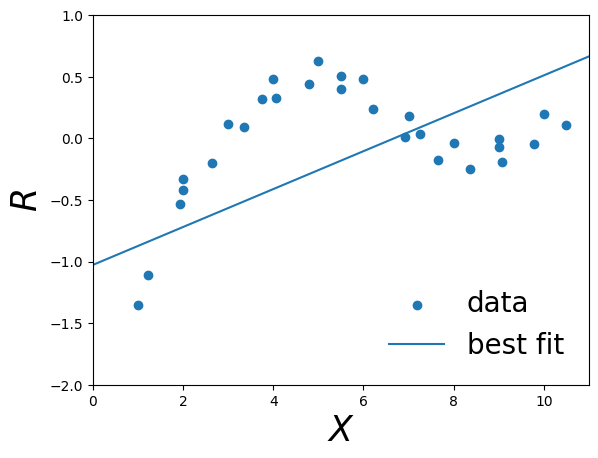

In [91]:
def linear_fit(X, r, N):
    """
    Fits the linear models to get the optimal values of W0 & W1.

    Input:
    X - The input data (note the capitalization).
    r - The target data.
    N - Number of samples in the input.

    Output:
    - 2 Scalars representing the optimal values of W0 & W1.
    """
    # YOUR SOLUTION HERE (2 pts)
    X_bar = np.mean(X)
    r_bar = np.mean(r)

    boven = np.sum(X * r) - N * X_bar * r_bar
    onder = np.sum(X**2) - N * (X_bar**2)
    w1 = boven / onder
    w0 = r_bar - w1 * X_bar
    return w0, w1

# YOUR SOLUTION HERE


# FIT MODEL
#???
w0_opt, w1_opt = linear_fit(X, r, len(X))
print("w0:", w0_opt)
print("w1:", w1_opt)

# PRINT COST
#???
print("Cost:", linear_cost(w0_opt, w1_opt, X, r))

# PLOT DATA AND LINE
#???
plt.scatter(X, r, label="data")
x_line = np.array([[plot_lims_x[0]], [plot_lims_x[1]]])
y_line = linear_model(w0_opt, w1_opt, x_line)

plt.plot(x_line, y_line, label="best fit")

plt.legend(loc=4, fontsize=20, frameon=False)
plt.xlabel("$X$", fontsize=25)
plt.ylabel("$R$", fontsize=25)

plt.xlim(plot_lims_x)
plt.ylim(plot_lims_y)
plt.show()

## Polynomial data [3 pt]

The linear model can easily be extended to polynomials of any order by expanding the original input with the squared input $x^2$, the cubed input $x^3$, etc and adding additional weights to the model. For ease of calculation, the input is also expanded with a vector of $1$'s, to represent the input for the constant parameter $w_0$. The parameters then become $w_0$, $w_1$, $w_2$, etc., one factor for each term of the polynomial.

So if originally the dataset of $N$ elements is of the form $X$ (subscripts are indices here)

$$ X = \left[\begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N \end{array} \right]$$

Then the matrix $D$ for a $K^{th}$-order polynomial becomes

$$ D = \left[\begin{array}{cccc}
1 & x_1 & x_1^2 & \cdots & x_1^K \\
1 & x_2 & x_2^2 & \cdots & x_2^K \\
\vdots \\
1 & x_N & x_N^2 & \cdots & x_N^K \\
\end{array} \right]$$

Write a function `create_D_matrix` that constructs this matrix for a given $X$ up the specified order $K$. Looking at plots for the dataset we have been using so far, the relationship between the points will probably be at least quadratic. Use the function to construct a matrix $D$ of order $2$, **print** the matrix and verify that it looks correct.

In [92]:
def create_D_matrix(X, K):
    # YOUR SOLUTION HERE
    """
    Creates the D-matrix.

    Input:
    X - The input data.
    K - The order of polynomial.

    Output:
    - A numpy array consisting of the D-matrix.
    """
    assert K >= 0, "Polynomial order (K) must be non-negative!"
    D = np.ones((len(X), 1))

    for k in range(1, K+1):
        D = np.hstack((D, X**k))

    return D

D2 = create_D_matrix(X, 2)
print(D2[:5])   # eerste 5 rijen printen
print("Shape:", D2.shape)

[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]]
Shape: (30, 3)


## Polynomial model [2 pt]

The parameters can now be represented as

$$ w = \left[\begin{array}{c} w_0 \\ w_1 \\ \vdots \\ w_K \end{array} \right]$$

The hypothesis for a single input then just becomes

$$ g(x_n) = \sum_{k=0}^K x_n^k w_k $$

Which we can write as a matrix multiplication for all inputs in a single equation

$$ \left[\begin{array}{cccc}
1 & x_1 & x_1^2 & \cdots & x_1^K \\
1 & x_2 & x_2^2 & \cdots & x_2^K \\
\vdots \\
1 & x_N & x_N^2 & \cdots & x_N^K \\
\end{array} \right]
\left[\begin{array}{c} w_0 \\ w_1 \\ \vdots \\ w_K \end{array} \right] = \left[\begin{array}{c} g(x_1) \\ g(x_2) \\ \vdots \\ g(x_N) \end{array} \right]$$

You can do matrix multiplication using the [dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) or [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) function. Write a function for computing the polynomial below

* `poly_model` should take a matrix $X$ and weight vector $w$, generate the corresponding $D$ matrix (using your previous function), and return the corresponding vector of hypotheses.

In [93]:
def poly_model(X, w):
    """
    Computes the D-matrix for a given input & weights.

    Input:
    X - The input data.
    w - The weight vector.

    Output:
    - A numpy array consisting of the D-matrix.
    """
    # YOUR SOLUTION HERE
    w = np.asarray(w).reshape(-1, 1)
    K = w.shape[0] - 1

    D = create_D_matrix(X, K)

    preds = np.matmul(D, w)
    return preds

## Polynomial cost function and model fitting [3 pt]

And for the cost function we can now use

$$ \ell(w; X, r) = \frac{1}{2N} \sum_{n=1}^N [r_n - \underbrace{D_n w}_{g(X_n)}]^2$$

Here, we compute the hypothesis $g(X)$ for every example using $D_n w$, take the difference with the actual output $r$ and finally square and sum each difference. Note that this is extremely similar to the mean squared error function we used for the linear case, and also that minimizing this error function is actually equivalent to maximizing the log likelihood of the parameter vector $w$ (see equations $4.31$ and $4.32$).

Now we have the cost function equation and can again take the partial derivative for each of the weights $w_0$ to $w_k$ and set their value equal to $0$. Solving the resulting system of equations will give the set of weights that minimize the cost function. The weights describing this lowest point of the cost function are the parameters which will produce the line that best fits our dataset.

Solving all partial derivate equations for each weight can actually be done with just a couple of matrix operations. Deriving the equation yourself can be a bit involved, but know that the principle is exactly the same as for the linear model computing just $w_0$ and $w_1$. The final equation for the weight vector becomes

(4.33) $$ w = (D^TD)^{-1}D^Tr $$

Numpy has built in functions for [transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html) and [inverse](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html). Use them to write the code for the following functions.

* `poly_cost` should return the total cost $\ell$ given $w$, $X$ and $r$. We can use this to see how good a fit is.
* `poly_fit` given $X$ and $r$, it should return the vector $w$ that bests fits the best linear relationship between matrix $D$ and vector $r$

Using this `poly_fit` function, find the best fitting weights for a quadric polynomial on the data and print these weights

In [94]:
def poly_cost(W, X, r):
    """
    Computes the cost function for the polynomial model.

    Input:
    W - The weight vector.
    X - The input data.
    r - The target data.

    Output:
    - The computed cost for the polynomial model.
    """
    # YOUR SOLUTION HERE (1pt)
    N = len(X)
    test = poly_model(X, W)
    error2 = r - test
    errorkwad = error2**2
    eindkost2 = (1 / (2 * N)) * np.sum(errorkwad)
    return eindkost2


def poly_fit(X, r, K=2):
    """
    Fits the polynomial model to find the optimal weight vector.

    Input:
    X - The input data.
    r - The target data.
    K - The order of polynomials.

    Output:
    - A numpy array containing the optimal fit of the weight vector.
    """
    # YOUR SOLUTION HERE
    DMatrix = create_D_matrix(X,K)
    Dtrans = np.transpose(DMatrix, axes=None)

    deel1 = np.matmul(Dtrans, DMatrix)
    deel2 = np.linalg.inv(deel1)
    deel3 = Dtrans @ r
    einde = np.matmul(deel2, deel3)
    return einde

w = poly_fit(X, r)
print(w)

[[-2.82046345]
 [ 1.06203507]
 [-0.08256336]]


## Plotting polynomials [1 pt]

Now lets try and figure out what our fitted quadratic polynomial looks like. As the function is not linear, we will need more than just 2 points to actually plot the line. The easiest solution is to create a whole bunch of x-values as samples, compute the corresponding y-values and plot those. With enough samples the line will look smooth, even if it is connected with linear segments.

To create these x-values samples, we can use the function [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html), you can use the following values for x: $$0<x<10.$$ Then just use the `poly_model` function you wrote earlier and raise NotImplementedError in the grid of x-values generated by linspace. Now just plot the original datapoints and the model fit, just as for the linear plot. Don't forget to show your plot at the end.

Use these steps to fill in the `poly_plot` function below and show the polynomial function defined by the weights you found for the quadratic polynomial.

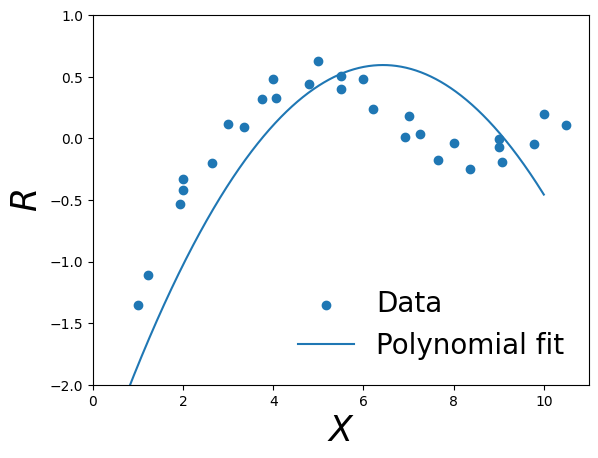

In [95]:
def poly_plot(W, X, r, n_grid_points=1000):
    """
    Generates the plot for the polynomial model.

    Input:
    W - The weight vector.
    X - The input data.
    r - The target data.
    n_grid_points - Number of grid points to use in the plot.

    Output:
    - No output (plot is generated in function).
    """
    # create grid of points (column vector)
    X_grid = np.linspace(0, 10, n_grid_points).reshape(-1, 1)

    # get predictions on grid
    y_grid = poly_model(X_grid, W)

    # PLOT DATA AND LINE
    plt.scatter(X, r, label="Data")
    plt.plot(X_grid, y_grid, label="Polynomial fit")

    plt.legend(loc=4, fontsize=20, frameon=False)
    plt.xlabel("$X$", fontsize=25)
    plt.ylabel("$R$", fontsize=25)

    plt.xlim(plot_lims_x)
    plt.ylim(plot_lims_y)
    plt.show()
poly_plot(w, X, r)



## Polynomial order [1 pt]

You can now create a polynomial fit on the data for a polynomial of any order. The next question then becomes: *What order polynomial fits the data the best?*

Using the `poly_fit` and `poly_plot`, try to fit different order polynomials to the data. Show the plot for the order polynomial you think fits best.

Note that the cost function will most likely decrease with each added polynomial term, as there is more flexibility in the model to fit the data points exactly. However, these weights will fit those few data points very well, but might have very extreme values in between points that would not be good predictors for new inputs. Something like an order 20 polynomial might have a very well fitting shape for the existing data points, but looks like it would be strange predictor at some of the possible other points. Try to find a fit that looks visually like it would generalize well to new points.

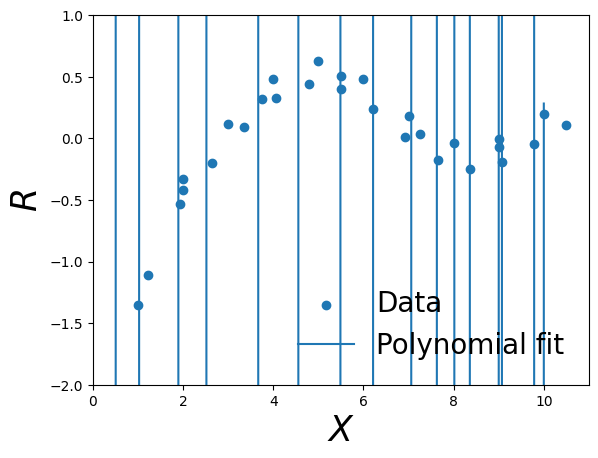

In [96]:
# YOUR SOLUTION HERE

# choose polynomial degree
K = 100 # bijvoorbeeld een derdegraads polynoom

# fit polynomial
w_best = poly_fit(X, r, K,)

# show model fit (and data)
poly_plot(w_best, X, r)



## Cross validation [2 pt]

Another way to answer this same question is to use cross validation. With cross validation you split the data into 2 parts and use one part to fit the model (training set) and the other part to see how well the model fits the remaining data (validation set). This way, we can select a model that is less prone to overfitting.

Write a function below to split the original dataset into 2 sets according to a given ratio. It is important to randomize your division, as simply using the first half of data for the one set and the second half for the other, might result in a strange distribution.

Split the original dataset using a ratio of 0.6 into a training and a validation set. Then for both of these sets, use your old `split_X_r` function to split them into their $X$ and $r$ parts.

*Hint: In order to guarantee that the results of the shuffle are deterministic (and will not fail the autograder), please use the newer [RNG Generator from Numpy](https://numpy.org/doc/2.3/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle) to shuffle your data. The old method `np.random.shuffle()` appears to lead to inconsistent results.*

In [97]:
def validation_split(data, ratio, seed):
    """
    Splits the input data into a training & validation set at the specified ratio.

    Input:
    data - The input data.
    ratio - Fraction that determines the division of the data.

    Output:
    - 2 Tuples containing respective train & validation data for both the input & the target.

    # NOTE: Make sure to use the newer RNG Generators from Numpy to pass the autotests!
    """
    # YOUR SOLUTION HERE
    rng = np.random.default_rng(seed)

    shuffled = rng.permutation(data)

    split_index = int(len(shuffled) * ratio)

    train_data = shuffled[:split_index]
    valid_data = shuffled[split_index:]

    x_train, r_train = split_X_r(train_data)
    x_valid, r_valid = split_X_r(valid_data)
    return (x_train, r_train), (x_valid, r_valid)


# NOTE: Use the RANDOM_SEED defined at the top of the file to shuffle the data.
(x_train, r_train), (x_valid, r_valid) = validation_split(points, 0.6, RANDOM_SEED)

## Model selection [5 pt]

With this new split of the data you can just repeatedly fit different order polynomials to the training set and see which produces the lowest cost on the validation set. The set of weights with the lowests cost on the validation set generalizes the best to new data and is thus the best overal fit on the dataset.

Write the function `best_poly_fit` below. Try a large range of polynomial orders (like 1 to 50), create the $D$ matrix based on the training set for each order and fit the weights for that polynomial. Then for each of these found weights, also create the D matrix for the validation set and compute the cost using `poly_cost`. Return the set of weights with the lowest cost on the validation set and the corresponding cost.

Run this fitting function with your training and validation sets. Plot the hypothesis function and show the weights that were found and what the cost was. Note that rerunning your validation split code above will result in a different random distribution and thus a different final fit.

Results from Cross Validation
Polynomial order: 9
Cost: 0.015


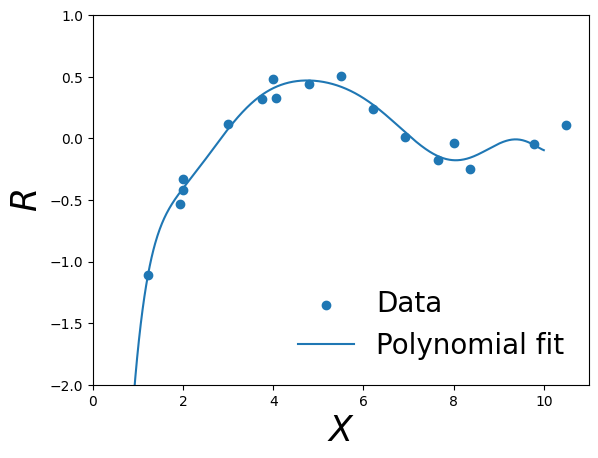

In [98]:
def best_poly_fit(train_x, train_r, val_x, val_r, max_K=50):
    """
    Computes the best fit for the polynomial model.

    Input:
    train_x - The training input.
    train_r - The target input associated with the training input.
    val_x - The validation data associated with the input.
    val_r - The targets from the validation data associated with the input.
    max_K - The highest order of polynomial that will be checked.

    Output:
    - The weight vector, total cost & order of polynomial corresponding to the best fit.
    """
    # YOUR SOLUTION HERE
    best_cost = np.inf
    best_w = None
    best_K = None
    for K in range(1, max_K + 1):

        w = poly_fit(train_x, train_r, K)
        cost = poly_cost(w, val_x, val_r)

        if cost < best_cost:
            best_cost = cost
            best_w = w
            best_K = K

    return best_w, best_cost, best_K


w, cost, K = best_poly_fit(x_train, r_train, x_valid, r_valid)

print("Results from Cross Validation")
print("Polynomial order: %d" %(K))
print("Cost: %.3f" %(cost))
poly_plot(w, x_train, r_train)